In [2]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx
import seaborn as sns
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import scipy.stats as stats

In [5]:
## Import DataFrames
#l = []
#for i in range(4):
#    l.append(pd.read_pickle("./files/one_total_run" + str(i+1) + ".pkl"))

df_ps10_m05_t20 = pd.read_pickle("./files/ps10_t20_m05_g125.pkl")
df_ps10_m07_t20 = pd.read_pickle("./files/ps10_t20_m07_g125.pkl")
df_ps10_m05_t30 = pd.read_pickle("./files/ps10_t30_m05_g125.pkl")
df_ps20_m02_t15 = pd.read_pickle("./files/ps20_t15_m02_g125.pkl")
df_ps20_m07_t15 = pd.read_pickle("./files/ps20_t15_m07_g125.pkl")
df_ps20_m05_t20 = pd.read_pickle("./files/ps20_t20_m05_g125.pkl") 
df_ps10_m05_t30 = pd.read_pickle("./files/ps10_t30_m05_g125.pkl")

df_ps20_m05_t30 = pd.read_pickle("./files/ps20_t30_m05_g125.pkl")
df_ps10_m05_t10 = pd.read_pickle("./files/ps10_t10_m05_g125.pkl")
df_ps10_m05_t05 = pd.read_pickle("./files/ps10_t05_m05_g125.pkl")
df_ps10_m05_t02 = pd.read_pickle("./files/ps10_t02_m05_g125.pkl")
df_ps10_m05_t05_g50 = pd.read_pickle("./files/ps10_t05_m05_g50.pkl")
df_ps10_m07_t05_g80 = pd.read_pickle("./files/ps10_t05_m07_g80.pkl")


In [6]:

k = []
for i in range(4):
    k = pd.read_pickle("./files/notDE/notDE_DEPHT_LIM_20_" + str(i) + ".pkl")
k2 = []
for i in range(2):
    k2 = pd.read_pickle("./files/notDE/notDE_DEPHT_LIM_50_" + str(i) + ".pkl")
    
k3 = pd.read_pickle("./files/notDE/notDE_DEPHT_LIM_200_1.pkl")

In [7]:
df_ps10_m05_t20['ps'] = 10
df_ps10_m05_t20['m'] = 5
df_ps10_m05_t20['g'] = 125

df_ps10_m07_t20['ps'] = 10
df_ps10_m07_t20['m'] = 7
df_ps10_m07_t20['g']= 125

df_ps10_m05_t30['ps'] = 10
df_ps10_m05_t30['m'] = 5
df_ps10_m05_t30['g']= 125

df_ps20_m02_t15['ps'] = 20
df_ps20_m02_t15['m'] = 2
df_ps20_m02_t15['g']= 125

df_ps20_m07_t15['ps'] = 20
df_ps20_m07_t15['m'] = 7
df_ps20_m07_t15['g']= 125

df_ps20_m05_t20['ps'] = 20
df_ps20_m05_t20['m'] = 5
df_ps20_m05_t20['g']= 125

df_ps10_m05_t30['ps'] = 10
df_ps10_m05_t30['m'] = 5
df_ps10_m05_t30['g']= 125


df_ps20_m05_t30['ps'] = 20
df_ps20_m05_t30['m'] = 5
df_ps20_m05_t30['g']= 125

df_ps10_m05_t10['ps'] = 10
df_ps10_m05_t10['m'] = 5
df_ps10_m05_t10['g']= 125

df_ps10_m05_t05['ps'] = 10
df_ps10_m05_t05['m'] = 5
df_ps10_m05_t05['g']= 125

df_ps10_m05_t02['ps'] = 10
df_ps10_m05_t02['m'] = 5
df_ps10_m05_t02['g']= 125

df_ps10_m05_t05_g50['ps'] = 10
df_ps10_m05_t05_g50['m'] = 5
df_ps10_m05_t05_g50['g']= 50

df_ps10_m07_t05_g80['ps'] = 10
df_ps10_m07_t05_g80['m'] = 7
df_ps10_m07_t05_g80['g']= 80

In [8]:
l =[ df_ps10_m05_t20, df_ps10_m07_t20, df_ps10_m05_t30, df_ps20_m02_t15, df_ps20_m07_t15, df_ps20_m05_t20, df_ps10_m05_t30 ]

In [9]:
l2 = [df_ps20_m05_t30, df_ps10_m05_t10, df_ps10_m05_t05, df_ps10_m05_t02, df_ps10_m05_t05_g50, df_ps10_m07_t05_g80]

In [10]:
l3 = l + l2

In [11]:
notDE = pd.concat([k, k2, k3], axis=0)

In [12]:
df = pd.concat(l3, join='inner')

In [13]:
df['max_g'] = df['g']
del df['g']

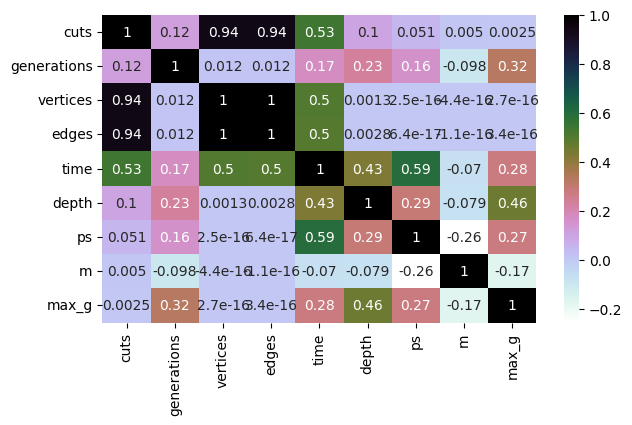

In [14]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.savefig("HeatMapCorr")
plt.show()

In [15]:
df[df['graph'] == 'g05_60_5.csv'].mean()

/tmp/ipykernel_16273/3884186768.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['graph'] == 'g05_60_5.csv'].mean()


cuts           470.769231
generations     79.461538
vertices        60.000000
edges          885.000000
time            58.436034
depth           15.923077
ps              13.076923
m                5.230769
max_g          115.769231
dtype: float64

In [16]:
df[df['graph'] == 'g05_60_5.csv']

,graph,cuts,best_partition,generations,vertices,edges,time,depth,ps,m,max_g
15,g05_60_5.csv,475,"[1, 10, 13, 15, 4, 5, 11, 14, 16, 17, 18, 21, ...",112,60,885,83.468750,20,10,5,125
15,g05_60_5.csv,473,"[13, 5, 11, 14, 16, 17, 18, 21, 23, 24, 26, 29...",105,60,885,75.312500,20,10,7,125
15,g05_60_5.csv,480,"[16, 1, 3, 7, 8, 10, 13, 14, 19, 21, 23, 30, 3...",71,60,885,120.937500,30,10,5,125
20,g05_60_5.csv,484,"[3, 18, 1, 2, 4, 7, 10, 11, 13, 14, 15, 16, 19...",114,60,885,47.855935,15,20,2,125
20,g05_60_5.csv,479,"[6, 9, 1, 3, 4, 7, 10, 11, 12, 13, 15, 16, 19,...",58,60,885,67.987189,15,20,7,125
20,g05_60_5.csv,481,"[9, 3, 6, 18, 1, 4, 7, 10, 11, 13, 15, 16, 19,...",107,60,885,79.625562,20,20,5,125
15,g05_60_5.csv,480,"[16, 1, 3, 7, 8, 10, 13, 14, 19, 21, 23, 30, 3...",71,60,885,120.937500,30,10,5,125
20,g05_60_5.csv,484,"[3, 9, 18, 1, 2, 4, 10, 12, 13, 14, 15, 16, 19...",95,60,885,105.324787,30,20,5,125
20,g05_60_5.csv,475,"[1, 3, 4, 7, 10, 11, 12, 13, 15, 16, 19, 20, 2...",63,60,885,25.821362,10,10,5,125
20,g05_60_5.csv,471,"[2, 4, 8, 9, 10, 11, 12, 13, 16, 17, 18, 21, 2...",87,60,885,12.898235,5,10,5,125


In [17]:
notDE['graph'] = notDE['graph'].apply(lambda x: x[:len(x)-4])

In [18]:
df_sdp = pd.read_csv('./files/_Data.csv', sep=',')

In [19]:
del df_sdp['Solution.1']
del df_sdp['Approx.']
del df_sdp['Ratio.1']
del df_sdp['Unnamed: 4']
del df_sdp['Problem']

In [20]:
df['graph'] = df['graph'].apply(lambda x: x[:len(x)-4])

In [21]:
df_sdp['graph'] = df_sdp['Problem Name']
del df_sdp['Problem Name']

In [22]:
df_test = df.merge(df_sdp, on=['graph','graph'], how='right')

In [23]:
df1 = df_test

In [24]:
df1['DE-ratio'] = df1['cuts']/df1['Solution']

In [25]:
df1

,graph,cuts,best_partition,generations,vertices,edges,time,depth,ps,m,max_g,Solution,Approximation,Ratio,DE-ratio
0,g05_60_0,474,"[8, 13, 4, 5, 6, 10, 11, 16, 17, 19, 20, 22, 2...",112,60,885,115.484375,20,10,5,125,536,468,0.8731,0.884328
1,g05_60_0,470,"[2, 8, 16, 20, 23, 3, 4, 5, 7, 11, 14, 15, 19,...",86,60,885,79.484375,20,10,7,125,536,468,0.8731,0.876866
2,g05_60_0,478,"[14, 9, 4, 13, 15, 16, 2, 11, 12, 30, 22, 23, ...",111,60,885,96.406250,30,10,5,125,536,468,0.8731,0.891791
3,g05_60_0,491,"[7, 8, 13, 1, 4, 5, 11, 14, 15, 17, 18, 19, 20...",116,60,885,65.748762,15,20,2,125,536,468,0.8731,0.916045
4,g05_60_0,489,"[9, 2, 3, 7, 12, 13, 22, 23, 25, 11, 26, 1, 4,...",56,60,885,61.031045,15,20,7,125,536,468,0.8731,0.912313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,g05_100_9,1269,"[1, 7, 10, 12, 14, 18, 19, 23, 24, 27, 29, 30,...",92,100,2475,451.805783,10,10,5,125,1430,1289,0.9014,0.887413
386,g05_100_9,1262,"[1, 3, 4, 8, 9, 10, 11, 16, 17, 18, 19, 20, 21...",45,100,2475,103.512388,5,10,5,125,1430,1289,0.9014,0.882517
387,g05_100_9,529,"[6, 33, 41, 46, 52, 56, 61, 72, 75, 76, 91, 97]",45,100,2475,75.077563,2,10,5,125,1430,1289,0.9014,0.369930
388,g05_100_9,1262,"[1, 3, 4, 8, 9, 10, 11, 16, 17, 18, 19, 20, 21...",43,100,2475,55.634121,5,10,5,50,1430,1289,0.9014,0.882517


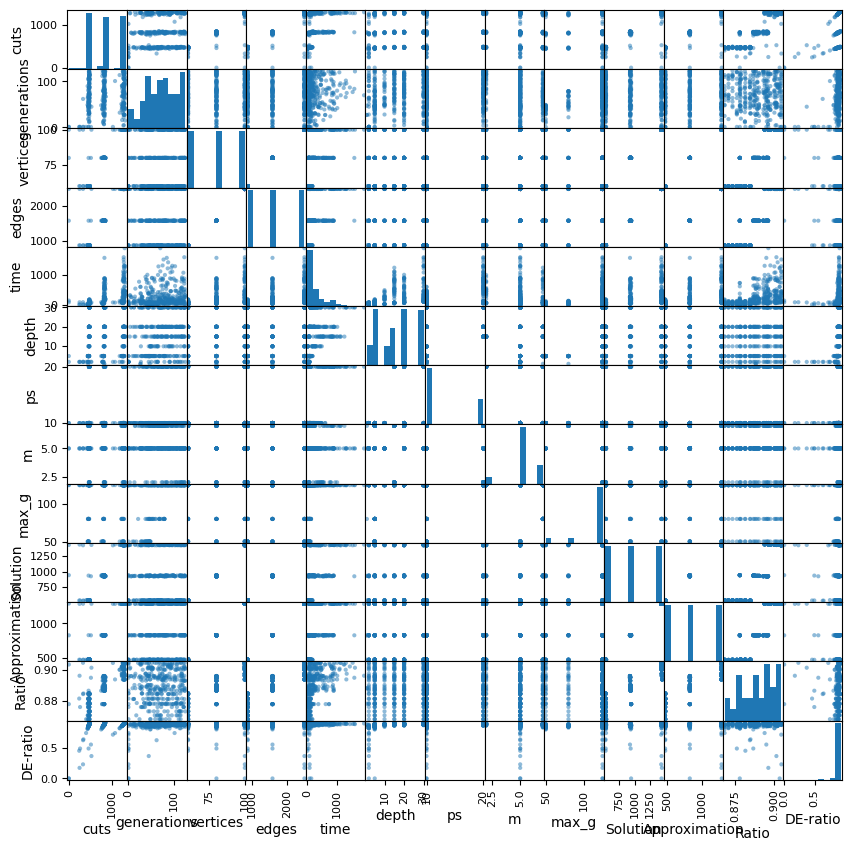

In [26]:
pd.plotting.scatter_matrix(df1, figsize=(10,10))
plt.show()

In [27]:
df1['rel_ratio'] = df1['cuts']/df1['Approximation']

In [28]:
df1[df1['rel_ratio'] > 1].count()

graph             205
cuts              205
best_partition    205
generations       205
vertices          205
edges             205
time              205
depth             205
ps                205
m                 205
max_g             205
Solution          205
Approximation     205
Ratio             205
DE-ratio          205
rel_ratio         205
dtype: int64

In [29]:
df1['DE-ratio'].mean()

0.8740103451835134

In [30]:
df1['time'].describe()

count     390.000000
mean      272.073436
std       326.255818
min         3.791087
25%        65.963510
50%       124.732140
75%       360.841385
max      1896.972170
Name: time, dtype: float64

In [31]:
df1['abs_error_ours'] = abs(df1['cuts'] - df1['Solution'])

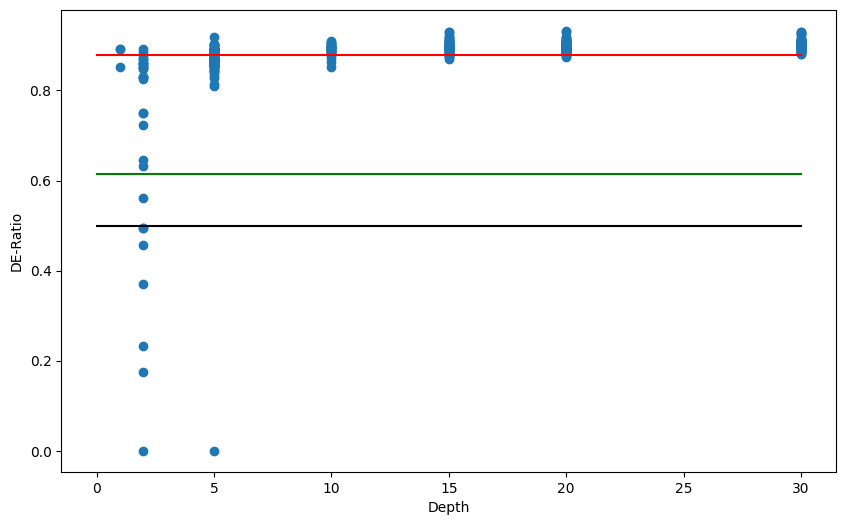

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df1['depth'], y = df1['DE-ratio'])
plt.xlabel("Depth")
plt.ylabel("DE-Ratio")
x1, y1 = [0, 30], [0.878, 0.878]
plt.plot(x1, y1, color = 'r')

x2, y2 = [0, 30], [0.614, 0.614]
plt.plot(x2, y2, color = 'g')

x3, y3 = [0, 30], [0.5, 0.5]
plt.plot(x3, y3, color = 'black')
plt.show()

In [33]:
min(df1[ df1['depth'] == 15]['DE-ratio'])

0.8703506907545164

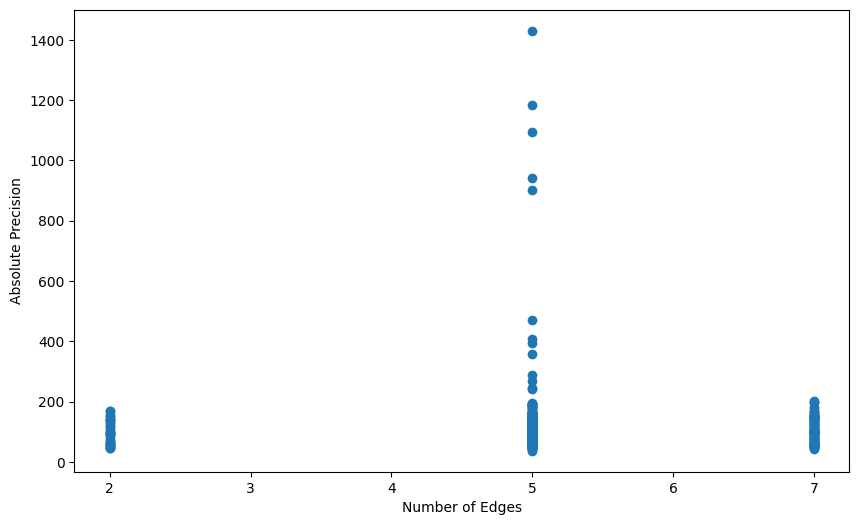

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df1['m'], y = df1['abs_error_ours'])
plt.xlabel("Number of Edges")
plt.ylabel("Absolute Precision")

plt.show()

In [35]:
df1["abs_error_ours"] = df1["cuts"] - df1["Solution"]
df1["abs_error_theirs"] = df1["Approximation"] - df1["Solution"]

df1["rel_error_ours"] = (df1["Solution"] - df1["cuts"])/df1["Solution"]
df1["rel_error_theirs"] = (df1["Solution"] - df1["Approximation"])/df1["Solution"]

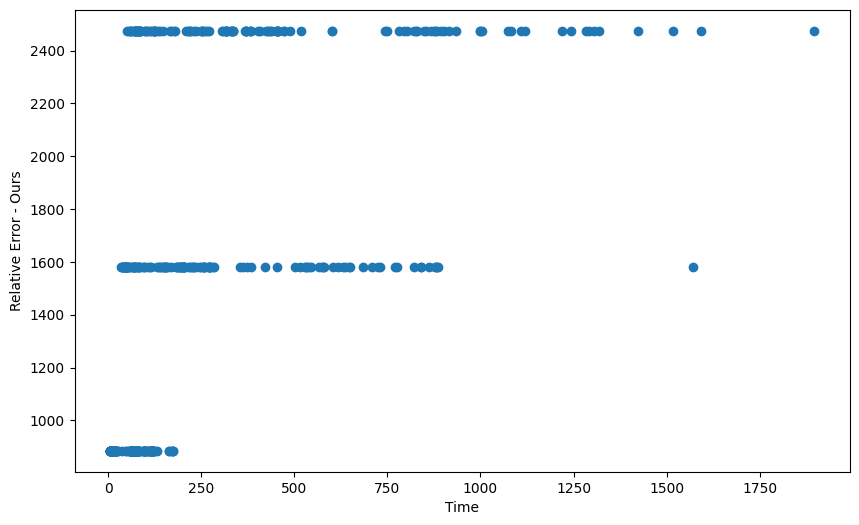

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df1['time'], y = df1['edges'])
plt.xlabel("Time")
plt.ylabel("Relative Error - Ours")

plt.show()

In [37]:
#df[ (df['m'] == 7) & (df['generations'] > 100) ]['abs_error'].mean()

In [38]:
df60 = df1[df1['vertices'] == 60]
df80 = df1[df1['vertices'] == 80]
df100 = df1[df1['vertices'] == 100]

In [39]:
df60.mean()

/tmp/ipykernel_16273/2576136420.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df60.mean()


cuts                466.200000
generations          71.046154
vertices             60.000000
edges               885.000000
time                 60.420365
depth                15.892308
ps                   13.076923
m                     5.230769
max_g               115.769231
Solution            532.400000
Approximation       467.200000
Ratio                 0.877550
DE-ratio              0.875656
rel_ratio             0.997863
abs_error_ours      -66.200000
abs_error_theirs    -65.200000
rel_error_ours        0.124344
rel_error_theirs      0.122437
dtype: float64

In [40]:
df80.mean()

/tmp/ipykernel_16273/519823119.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df80.mean()


cuts                 812.961538
generations           71.484615
vertices              80.000000
edges               1580.000000
time                 293.684904
depth                 15.476923
ps                    13.076923
m                      5.230769
max_g                115.769231
Solution             929.100000
Approximation        826.700000
Ratio                  0.889810
DE-ratio               0.875129
rel_ratio              0.983377
abs_error_ours      -116.138462
abs_error_theirs    -102.400000
rel_error_ours         0.124871
rel_error_theirs       0.110186
dtype: float64

In [41]:
df100.mean()

/tmp/ipykernel_16273/2410858137.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df100.mean()


cuts                1247.107692
generations           71.992308
vertices             100.000000
edges               2475.000000
time                 462.115040
depth                 15.923077
ps                    13.076923
m                      5.230769
max_g                115.769231
Solution            1431.400000
Approximation       1288.900000
Ratio                  0.900460
DE-ratio               0.871246
rel_ratio              0.967587
abs_error_ours      -184.292308
abs_error_theirs    -142.500000
rel_error_ours         0.128754
rel_error_theirs       0.099543
dtype: float64

In [42]:
df60.describe()

,cuts,generations,vertices,edges,time,depth,ps,m,max_g,Solution,Approximation,Ratio,DE-ratio,rel_ratio,abs_error_ours,abs_error_theirs,rel_error_ours,rel_error_theirs
count,130.000000,130.000000,130.0,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,466.200000,71.046154,60.0,885.0,60.420365,15.892308,13.076923,5.230769,115.769231,532.400000,467.200000,0.877550,0.875656,0.997863,-66.200000,-65.200000,0.124344,0.122437
std,33.904426,32.569987,0.0,0.0,47.071554,9.817123,4.633239,1.254687,22.520116,3.180854,1.542172,0.005393,0.063618,0.072567,33.780504,3.199806,0.063618,0.005370
min,243.000000,1.000000,60.0,885.0,3.791087,1.000000,10.000000,2.000000,50.000000,527.000000,464.000000,0.868000,0.457627,0.519231,-288.000000,-71.000000,0.070209,0.115312
25%,467.250000,47.000000,60.0,885.0,8.855410,5.000000,10.000000,5.000000,125.000000,530.000000,466.000000,0.873100,0.871993,0.998397,-68.000000,-68.000000,0.100189,0.118644
50%,475.000000,70.500000,60.0,885.0,63.722845,15.000000,10.000000,5.000000,125.000000,532.500000,467.500000,0.878250,0.891791,1.017094,-58.000000,-65.000000,0.108209,0.121723
75%,479.000000,102.250000,60.0,885.0,96.406250,20.000000,20.000000,5.000000,125.000000,535.000000,468.000000,0.881400,0.899811,1.025751,-53.000000,-63.000000,0.128007,0.126866
max,492.000000,124.000000,60.0,885.0,173.156250,30.000000,20.000000,7.000000,125.000000,538.000000,470.000000,0.884700,0.929791,1.051502,-37.000000,-61.000000,0.542373,0.131970


In [43]:
df1[df1['rel_ratio'] > 1].count()

graph               205
cuts                205
best_partition      205
generations         205
vertices            205
edges               205
time                205
depth               205
ps                  205
m                   205
max_g               205
Solution            205
Approximation       205
Ratio               205
DE-ratio            205
rel_ratio           205
abs_error_ours      205
abs_error_theirs    205
rel_error_ours      205
rel_error_theirs    205
dtype: int64

In [44]:
notDE

,graph,cuts,best_partition,generations,vertices,edges,time,depth
0,g05_100_0,879,"[0, 6, 13, 20, 22, 23, 36, 48, 49, 57, 60, 66,...",0,100,2475,8.375000,20
1,g05_100_1,1235,"[13, 21, 22, 8, 23, 0, 3, 4, 6, 9, 12, 14, 17,...",0,100,2475,7.593750,20
2,g05_100_2,1182,"[24, 7, 16, 1, 5, 6, 14, 20, 21, 29, 31, 32, 3...",0,100,2475,7.593750,20
3,g05_100_3,1262,"[25, 28, 4, 14, 3, 7, 19, 20, 26, 29, 39, 44, ...",0,100,2475,7.046875,20
4,g05_100_4,1200,"[5, 30, 8, 18, 25, 26, 29, 39, 0, 7, 9, 13, 17...",0,100,2475,7.093750,20
...,...,...,...,...,...,...,...,...
25,g05_80_5,797,"[8, 2, 19, 3, 9, 13, 21, 23, 31, 10, 16, 17, 1...",0,80,1580,51.953125,200
26,g05_80_6,772,"[2, 4, 7, 8, 9, 11, 6, 13, 25, 30, 0, 23, 26, ...",0,80,1580,52.078125,200
27,g05_80_7,793,"[7, 8, 9, 12, 16, 17, 25, 0, 2, 5, 6, 11, 15, ...",0,80,1580,51.250000,200
28,g05_80_8,820,"[8, 23, 2, 4, 11, 12, 13, 16, 17, 20, 21, 22, ...",0,80,1580,52.921875,200


In [45]:
min(notDE["cuts"])

122

In [46]:
kl = pd.DataFrame()
kl['Solution'] = df1['Solution']
kl['graph'] = df1['graph']

notDE = notDE.merge(kl, on=['graph','graph'], how='right')

notDE["abs_error_trev"] = abs(notDE["Solution"] - notDE["cuts"])

In [47]:
df_depth5 = df1[ df1['depth'] == 5 ]

In [48]:
df_depth20 = df1[ df1['depth'] == 20 ]

In [49]:
df["abs_error"] = abs(df1["cuts"] - df1["Solution"])

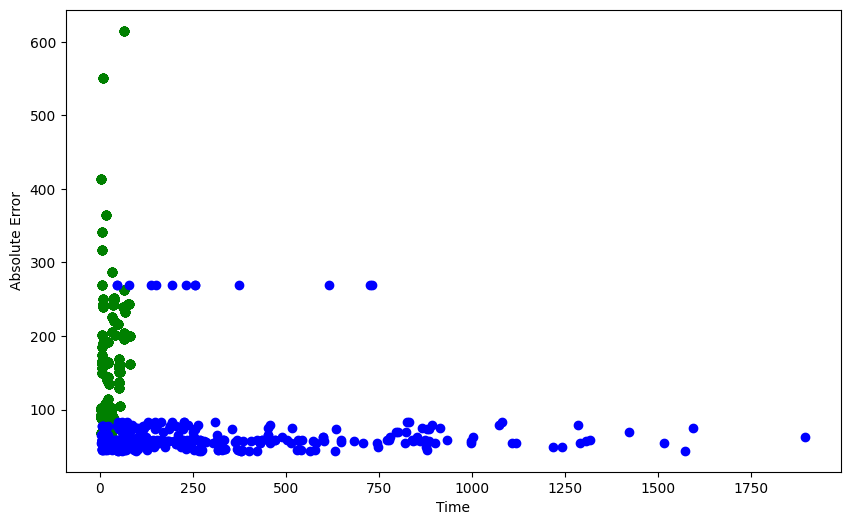

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = notDE['time'], y = notDE['abs_error_trev'], color='g')
plt.xlabel("Time")
plt.ylabel("Absolute Error")
#x1, y1 = [0, 30], [0.878, 0.878]
#plt.plot(x1, y1, color = 'r')
ax.scatter(x = df['time'], y = df['abs_error'], color='b')
plt.xlabel("Time")
plt.ylabel("Absolute Error")

plt.show()

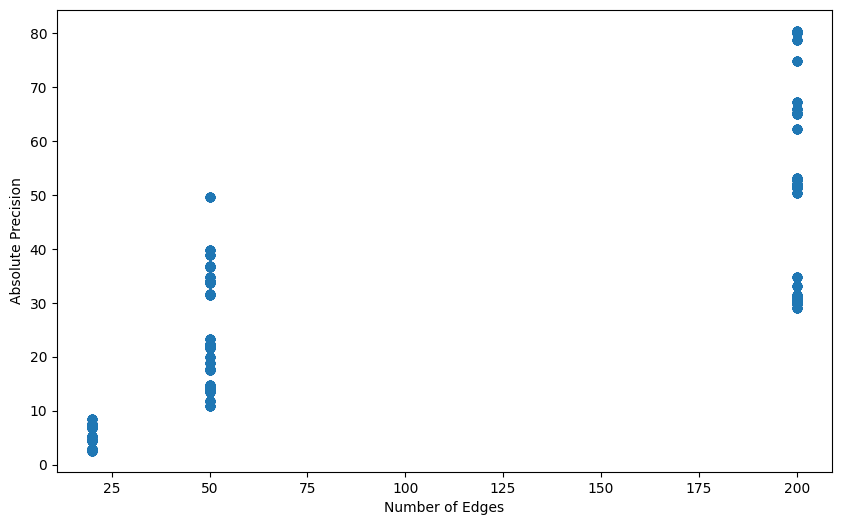

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = notDE['depth'], y = notDE['time'])
plt.xlabel("Number of Edges")
plt.ylabel("Absolute Precision")

plt.show()

In [52]:
df1['generations'].describe()

count    390.000000
mean      71.507692
std       32.953168
min        1.000000
25%       47.000000
50%       73.000000
75%       99.000000
max      124.000000
Name: generations, dtype: float64

In [3]:
data = []
#for i in range(15, 25):
for i in range(25):
    data.append(pd.read_pickle("./files/data_" + str(i+1) + ".pkl"))


In [111]:
merge_df = pd.DataFrame()
merge_df['Solution'] = df1['Solution']
merge_df['graph'] = df1['graph']

for i in range(len(data)):
    data[i]['graph'] = data[i]['graph'].apply(lambda x: x[:len(x)-4])
    data[i] = data[i].merge(merge_df, on=['graph','graph'], how='right')
    data[i]["abs_error"] = abs(df1["Solution"] - data[i]["cuts"])

In [112]:
for i in range(len(data)):
    data[i]['DE-ratio'] = data[i]["cuts"] / data[i]["Solution"]

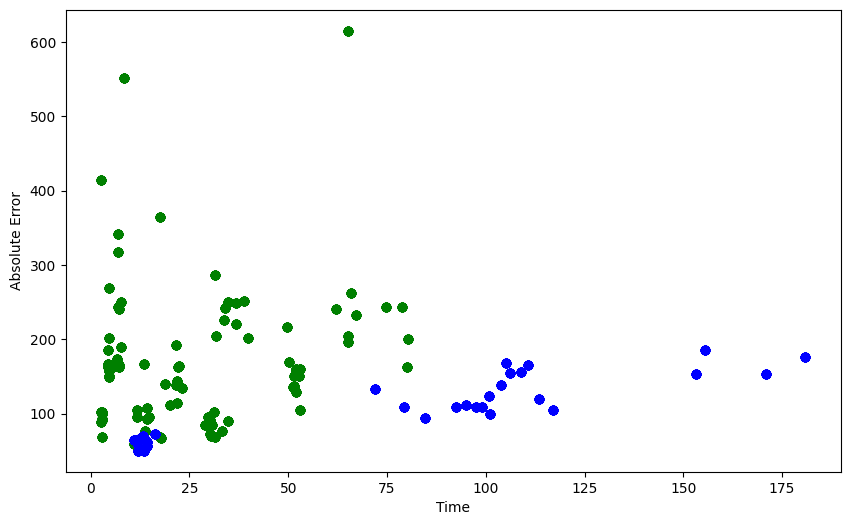

In [113]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = notDE['time'], y = notDE['abs_error_trev'], color='g')
plt.xlabel("Time")
plt.ylabel("Absolute Error")
#x1, y1 = [0, 30], [0.878, 0.878]
#plt.plot(x1, y1, color = 'r')
ax.scatter(x = data[0]['time'], y = data[0]['abs_error'], color='b')
plt.xlabel("Time")
plt.ylabel("Absolute Error")

plt.show()

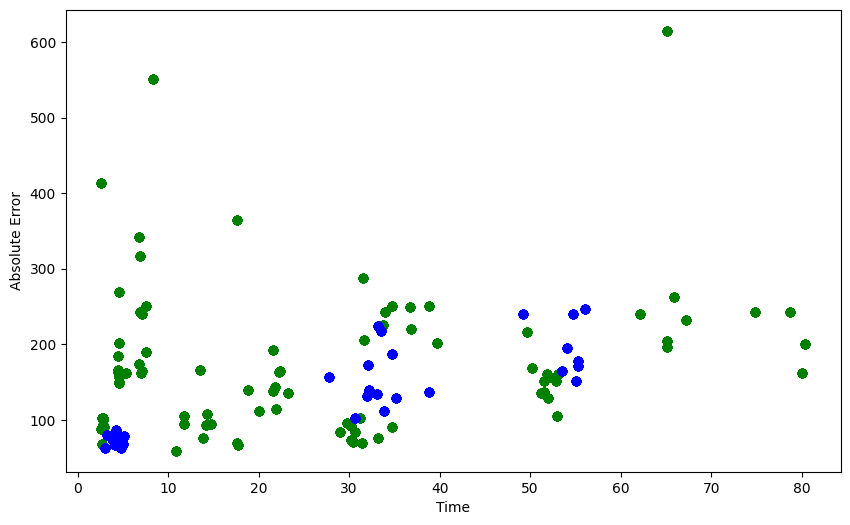

In [114]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = notDE['time'], y = notDE['abs_error_trev'], color='g')
plt.xlabel("Time")
plt.ylabel("Absolute Error")
#x1, y1 = [0, 30], [0.878, 0.878]
#plt.plot(x1, y1, color = 'r')
ax.scatter(x = data[1]['time'], y = data[1]['abs_error'], color='b')
plt.xlabel("Time")
plt.ylabel("Absolute Error")

plt.show()

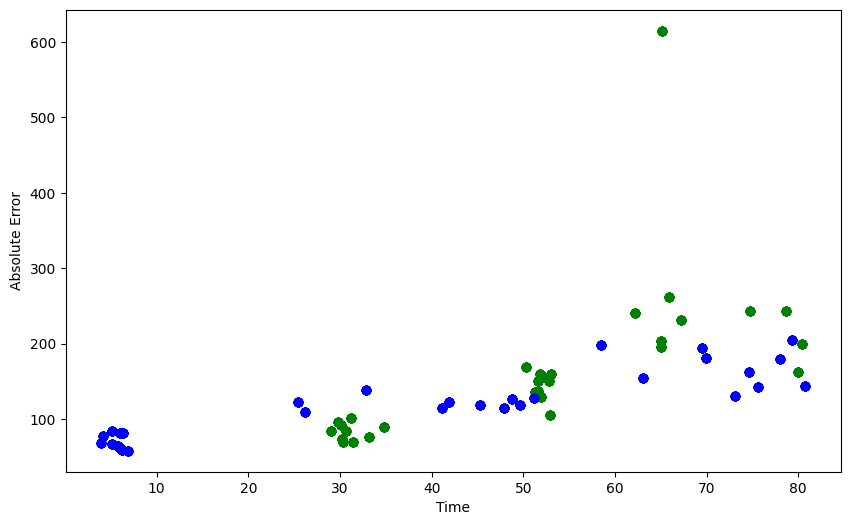

In [116]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = nDE200['time'], y = nDE200['abs_error_trev'], color='g')
plt.xlabel("Time")
plt.ylabel("Absolute Error")
#x1, y1 = [0, 30], [0.878, 0.878]
#plt.plot(x1, y1, color = 'r')
ax.scatter(x = data[2]['time'], y = data[2]['abs_error'], color='b')
plt.xlabel("Time")
plt.ylabel("Absolute Error")

plt.show()

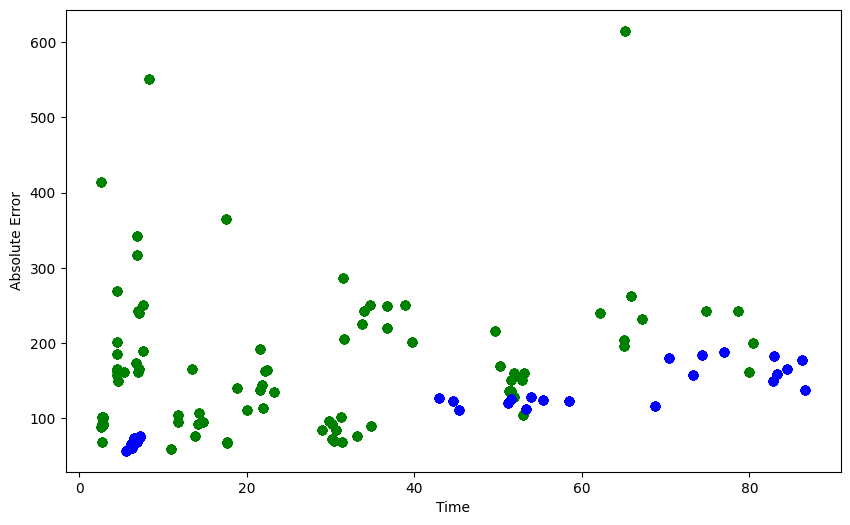

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = notDE['time'], y = notDE['abs_error_trev'], color='g')
plt.xlabel("Time")
plt.ylabel("Absolute Error")
#x1, y1 = [0, 30], [0.878, 0.878]
#plt.plot(x1, y1, color = 'r')
ax.scatter(x = data[3]['time'], y = data[3]['abs_error'], color='b')
plt.xlabel("Time")
plt.ylabel("Absolute Error")

plt.show()

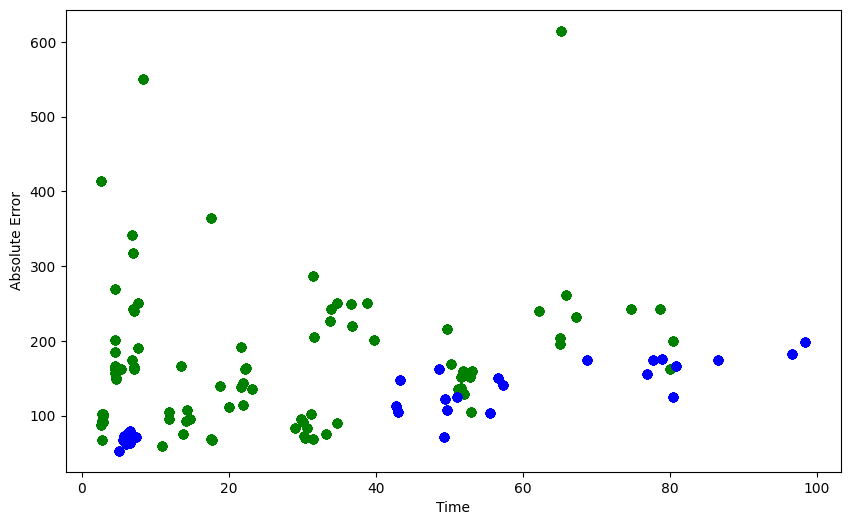

In [117]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = notDE['time'], y = notDE['abs_error_trev'], color='g')
plt.xlabel("Time")
plt.ylabel("Absolute Error")
#x1, y1 = [0, 30], [0.878, 0.878]
#plt.plot(x1, y1, color = 'r')
ax.scatter(x = data[15]['time'], y = data[15]['abs_error'], color='b')
plt.xlabel("Time")
plt.ylabel("Absolute Error")

plt.show()

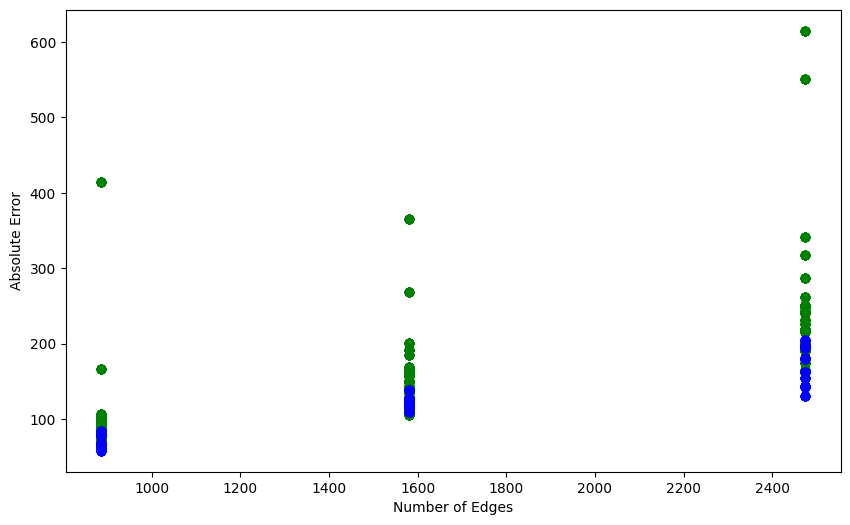

In [118]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = notDE['edges'], y = notDE['abs_error_trev'], color='g')
plt.xlabel("Number of Edges")
plt.ylabel("Absolute Error")
#x1, y1 = [0, 30], [0.878, 0.878]
#plt.plot(x1, y1, color = 'r')
ax.scatter(x = data[2]['edges'], y = data[2]['abs_error'], color='b')
plt.xlabel("Number of Edges")
plt.ylabel("Absolute Error")

plt.show()

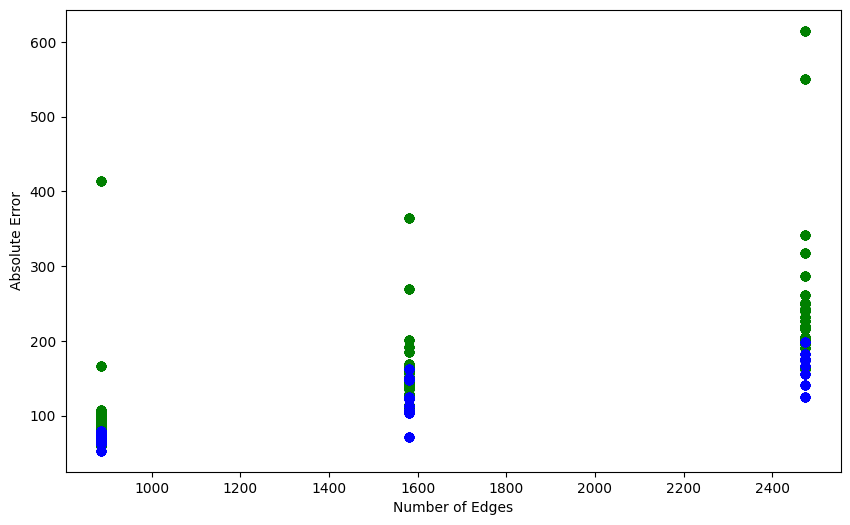

In [119]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = notDE['edges'], y = notDE['abs_error_trev'], color='g')
plt.xlabel("Number of Edges")
plt.ylabel("Absolute Error")
#x1, y1 = [0, 30], [0.878, 0.878]
#plt.plot(x1, y1, color = 'r')
ax.scatter(x = data[15]['edges'], y = data[15]['abs_error'], color='b')
plt.xlabel("Number of Edges")
plt.ylabel("Absolute Error")

plt.show()

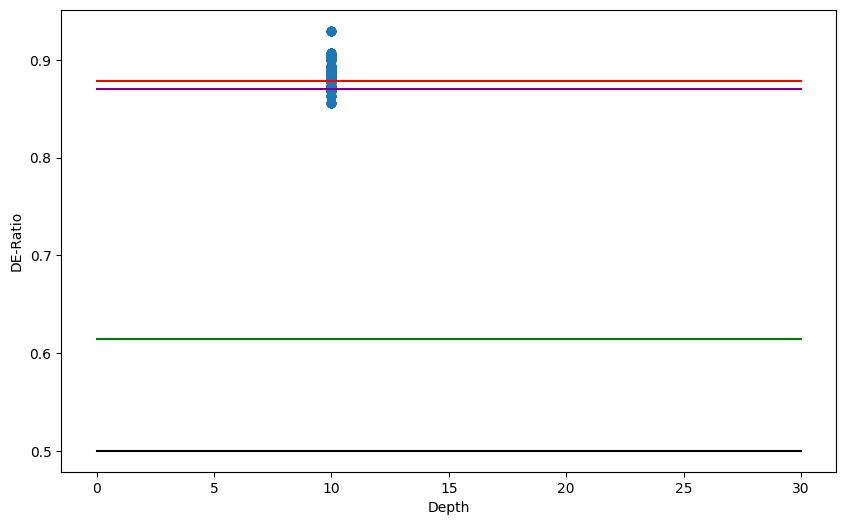

In [120]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data[0]['depth'], y = data[0]['DE-ratio'])
plt.xlabel("Depth")
plt.ylabel("DE-Ratio")
x1, y1 = [0, 30], [0.878, 0.878]
plt.plot(x1, y1, color = 'r')



x2, y2 = [0, 30], [0.614, 0.614]
plt.plot(x2, y2, color = 'g')

x3, y3 = [0, 30], [0.5, 0.5]
plt.plot(x3, y3, color = 'black')

x4, y4 = [0, 30], [0.8703, 0.8703]
plt.plot(x4, y4, color = 'purple') #Min value DE with depth = 15
plt.show()


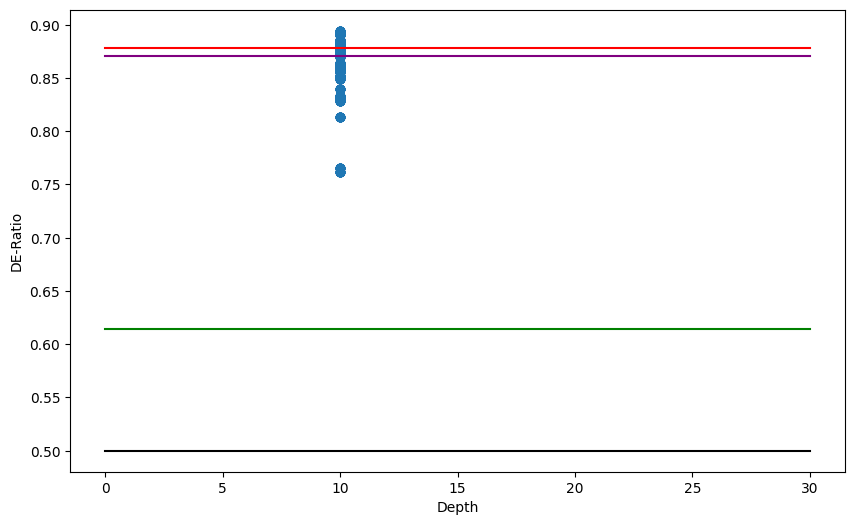

In [121]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data[1]['depth'], y = data[1]['DE-ratio'])
plt.xlabel("Depth")
plt.ylabel("DE-Ratio")
x1, y1 = [0, 30], [0.878, 0.878]
plt.plot(x1, y1, color = 'r')



x2, y2 = [0, 30], [0.614, 0.614]
plt.plot(x2, y2, color = 'g')

x3, y3 = [0, 30], [0.5, 0.5]
plt.plot(x3, y3, color = 'black')

x4, y4 = [0, 30], [0.8703, 0.8703]
plt.plot(x4, y4, color = 'purple') #Min value DE with depth = 15
plt.show()

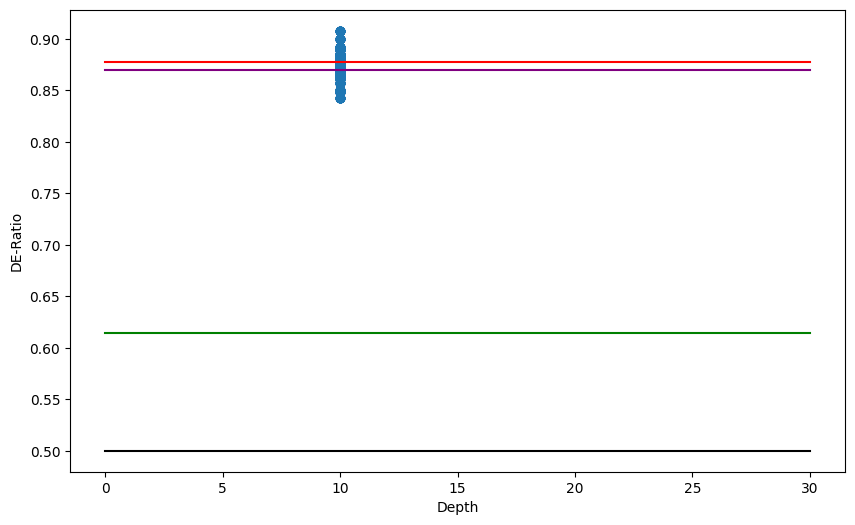

In [122]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data[2]['depth'], y = data[2]['DE-ratio'])
plt.xlabel("Depth")
plt.ylabel("DE-Ratio")
x1, y1 = [0, 30], [0.878, 0.878]
plt.plot(x1, y1, color = 'r')



x2, y2 = [0, 30], [0.614, 0.614]
plt.plot(x2, y2, color = 'g')

x3, y3 = [0, 30], [0.5, 0.5]
plt.plot(x3, y3, color = 'black')

x4, y4 = [0, 30], [0.8703, 0.8703]
plt.plot(x4, y4, color = 'purple') #Min value DE with depth = 15
plt.show()

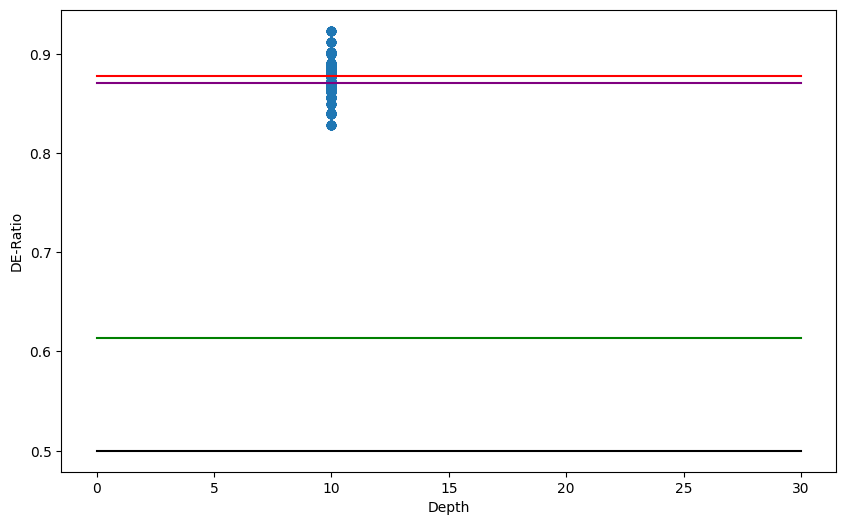

In [123]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data[15]['depth'], y = data[15]['DE-ratio'])
plt.xlabel("Depth")
plt.ylabel("DE-Ratio")
x1, y1 = [0, 30], [0.878, 0.878]
plt.plot(x1, y1, color = 'r')



x2, y2 = [0, 30], [0.614, 0.614]
plt.plot(x2, y2, color = 'g')

x3, y3 = [0, 30], [0.5, 0.5]
plt.plot(x3, y3, color = 'black')

x4, y4 = [0, 30], [0.8703, 0.8703]
plt.plot(x4, y4, color = 'purple') #Min value DE with depth = 15
plt.show()


In [124]:
#min(notDE['ratio']) #g_max = 80

In [125]:
data[10]

,graph,cuts,best_partition,generations,vertices,edges,time,depth,g_max,mutation,population,Solution,abs_error,DE-ratio
0,g05_60_0,469,"[2, 5, 16, 9, 4, 12, 14, 15, 23, 30, 31, 1, 7,...",45,60,885,9.678032,10,60,0.7,8,536,67,0.875000
1,g05_60_0,469,"[2, 5, 16, 9, 4, 12, 14, 15, 23, 30, 31, 1, 7,...",45,60,885,9.678032,10,60,0.7,8,536,67,0.875000
2,g05_60_0,469,"[2, 5, 16, 9, 4, 12, 14, 15, 23, 30, 31, 1, 7,...",45,60,885,9.678032,10,60,0.7,8,536,67,0.875000
3,g05_60_0,469,"[2, 5, 16, 9, 4, 12, 14, 15, 23, 30, 31, 1, 7,...",45,60,885,9.678032,10,60,0.7,8,536,67,0.875000
4,g05_60_0,469,"[2, 5, 16, 9, 4, 12, 14, 15, 23, 30, 31, 1, 7,...",45,60,885,9.678032,10,60,0.7,8,536,67,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,g05_100_9,1238,"[27, 12, 17, 19, 20, 28, 34, 0, 4, 5, 8, 10, 1...",42,100,2475,143.987541,10,60,0.7,8,1430,192,0.865734
386,g05_100_9,1238,"[27, 12, 17, 19, 20, 28, 34, 0, 4, 5, 8, 10, 1...",42,100,2475,143.987541,10,60,0.7,8,1430,192,0.865734
387,g05_100_9,1238,"[27, 12, 17, 19, 20, 28, 34, 0, 4, 5, 8, 10, 1...",42,100,2475,143.987541,10,60,0.7,8,1430,192,0.865734
388,g05_100_9,1238,"[27, 12, 17, 19, 20, 28, 34, 0, 4, 5, 8, 10, 1...",42,100,2475,143.987541,10,60,0.7,8,1430,192,0.865734


In [126]:
for df in data:
    print(min(df['DE-ratio']))

0.8562162162162162
0.7619553666312433
0.8424015009380863
0.8310308182784272
0.8235919234856536
0.8416578108395324
0.8424015009380863
0.7884078212290503
0.8493408662900188
0.6996268656716418
0.8508108108108108
0.8513011152416357
0.8587360594795539
0.8364661654135338
0.8345864661654135
0.8278427205100957
0.8364661654135338
0.8496503496503497
0.8549905838041432
0.825426944971537
0.828819068255688
0.825187969924812
0.8442776735459663
0.8493408662900188
0.845724907063197


In [127]:
for df in data:
    print(df['DE-ratio'].mean())

0.8848729943920131
0.8559000654591713
0.873285256531566
0.8806050125986575
0.8792739485548168
0.8795080218299576
0.8764509370496762
0.8770718988705091
0.8809434280740063
0.8748800496623278
0.8779275352733856
0.8804410693723126
0.8796484285904252
0.8710519593112866
0.876457491653943
0.8744484090169475
0.8734773206817248
0.8770724546288021
0.8751824769103789
0.8708011423560252
0.8719005538498578
0.8738628760422457
0.8761210196280398
0.8795937819816588
0.8775443148964529


In [71]:
max(notDE['abs_error_trev']) #g_max = 80

615

In [72]:
for df in data:
    print(max(df['abs_error']))

198
211
215
188
220
211
197
194
195
187


In [73]:
notDE['ratio'] = notDE['cuts'] / notDE['Solution']

In [74]:
notDE['time'].mean()

26.65763888888889

In [128]:
for df in data:
    print(df['time'].mean())

79.30682550429997
29.094379851400014
39.59267914499999
60.774788709366646
58.749761375900036
59.770418658599986
68.00670212743333
57.58729887586667
57.89767171093334
59.034569695233316
68.21066990300001
65.242335212
65.41260485733333
39.8104384161
45.74184055313334
45.118146052566665
43.89403298816668
46.06675185710002
46.38680341693335
46.72824651756664
46.76054669569999
55.27324042386665
43.378006477666666
39.32549162589999
44.526690036233326


In [77]:
min(df['DE-ratio'])

0.845724907063197

In [79]:
df_all = pd.concat(data, join='inner')

In [80]:
min(df_all['DE-ratio'])

0.825187969924812

In [81]:
print(df_all['time'].mean())

45.74579560917


In [92]:
print((df_all['abs_error'].mean()))

118.79333333333334


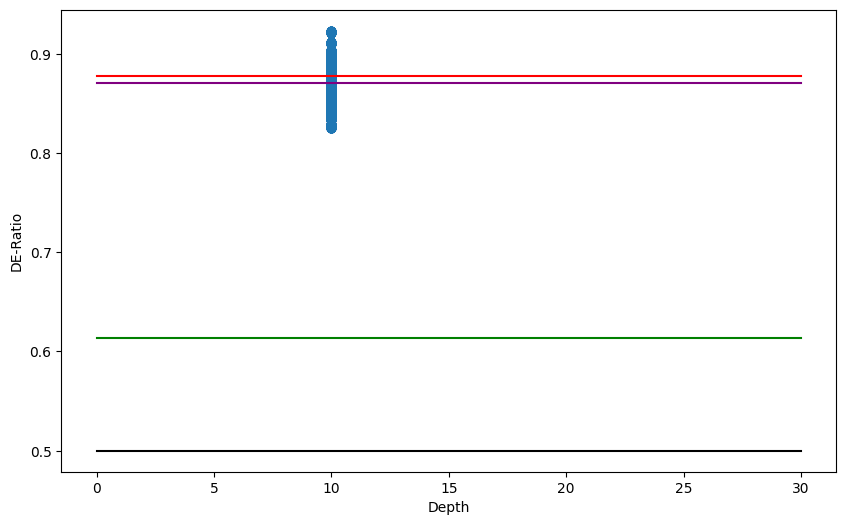

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_all['depth'], y = df_all['DE-ratio'])
plt.xlabel("Depth")
plt.ylabel("DE-Ratio")
x1, y1 = [0, 30], [0.878, 0.878]
plt.plot(x1, y1, color = 'r')



x2, y2 = [0, 30], [0.614, 0.614]
plt.plot(x2, y2, color = 'g')

x3, y3 = [0, 30], [0.5, 0.5]
plt.plot(x3, y3, color = 'black')

x4, y4 = [0, 30], [0.8703, 0.8703]
plt.plot(x4, y4, color = 'purple') #Min value DE with depth = 15
plt.show()


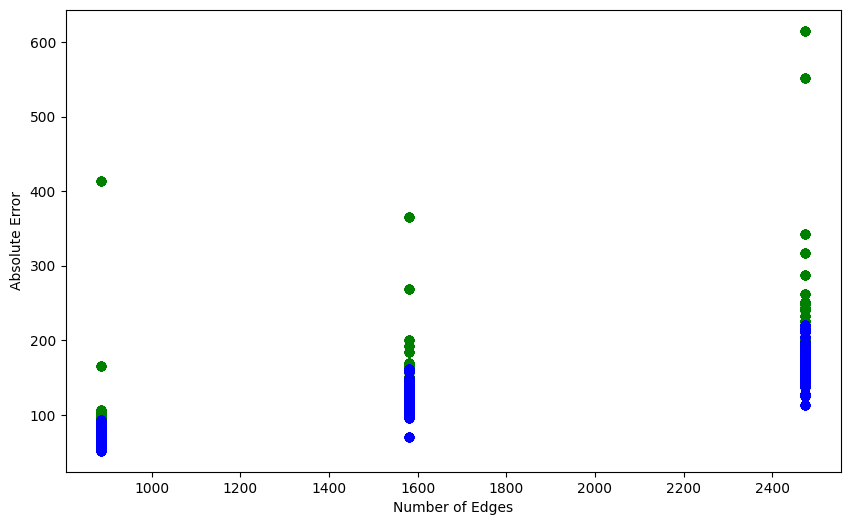

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = notDE['edges'], y = notDE['abs_error_trev'], color='g')
plt.xlabel("Number of Edges")
plt.ylabel("Absolute Error")
#x1, y1 = [0, 30], [0.878, 0.878]
#plt.plot(x1, y1, color = 'r')
ax.scatter(x = df_all['edges'], y = df_all['abs_error'], color='b')
plt.xlabel("Number of Edges")
plt.ylabel("Absolute Error")

plt.show()

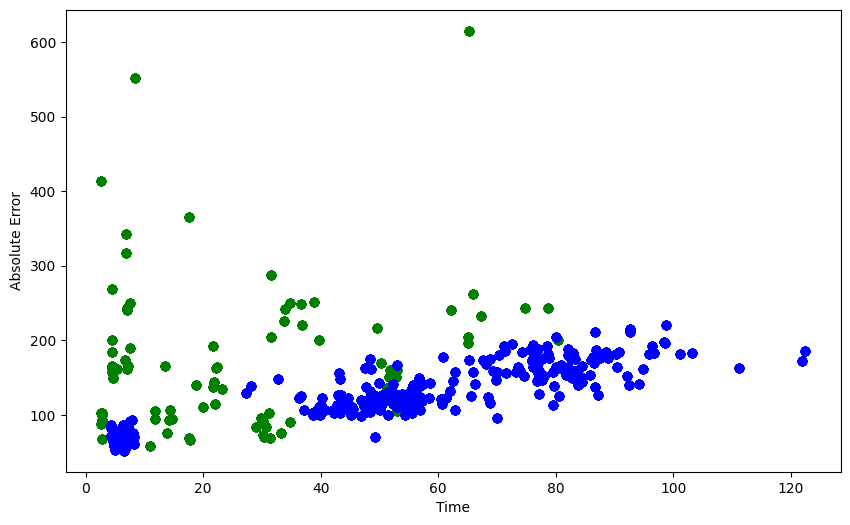

In [87]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = notDE['time'], y = notDE['abs_error_trev'], color='g')
plt.xlabel("Time")
plt.ylabel("Absolute Error")
#x1, y1 = [0, 30], [0.878, 0.878]
#plt.plot(x1, y1, color = 'r')
ax.scatter(x = df_all['time'], y = df_all['abs_error'], color='b')
plt.xlabel("Time")
plt.ylabel("Absolute Error")

plt.show()

In [104]:
nDE200 = notDE[ notDE['depth'] == 200 ]

In [93]:
df_all['DE-ratio'].mean()

0.8750004349992134

In [106]:
nDE200['ratio'].mean()

0.8349765790698948

In [96]:
df_all['abs_error'].mean()

118.79333333333334

In [107]:
nDE200['abs_error_trev'].mean()

162.93333333333334

In [108]:
nDE200['time'].mean()

51.15

In [109]:
df_all['time'].mean()

45.74579560917

In [100]:
print(max(notDE['ratio']))
print(min(notDE['ratio']))

0.8903345724907064
0.22761194029850745


In [101]:
print(max(df_all['DE-ratio']))
print(min(df_all['DE-ratio']))

0.9232432432432433
0.825187969924812


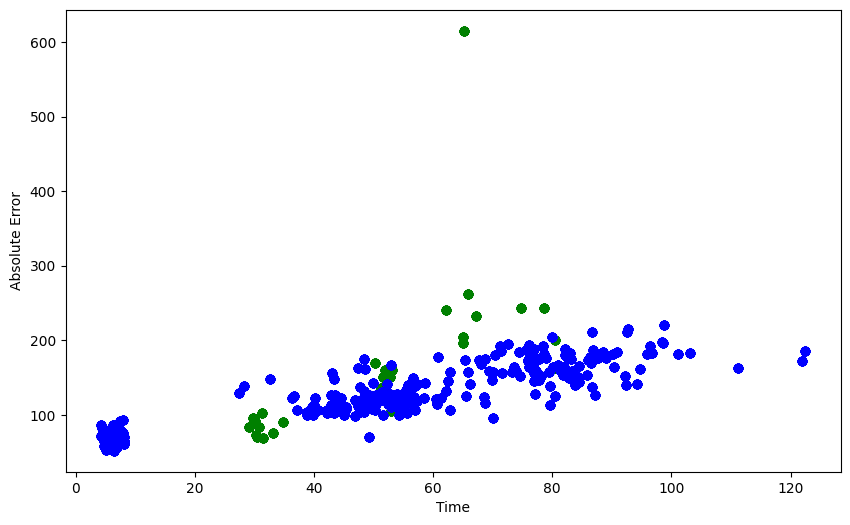

In [105]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = nDE200['time'], y = nDE200['abs_error_trev'], color='g')
plt.xlabel("Time")
plt.ylabel("Absolute Error")
#x1, y1 = [0, 30], [0.878, 0.878]
#plt.plot(x1, y1, color = 'r')
ax.scatter(x = df_all['time'], y = df_all['abs_error'], color='b')
plt.xlabel("Time")
plt.ylabel("Absolute Error")

plt.show()